In [93]:
import pandas as pd

url='http://10.1.13.178:5000/xbbg/USGG10YR'
df1=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/SP500'
df2=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/DXY'
df3=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/WTI'
df4=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/GOLD'
df5=pd.read_csv(url)

url='http://10.1.13.178:5000/ecos/KRW'
df6=pd.read_csv(url)

url='http://10.1.13.178:5000/xbbg/NICKEL'
df7=pd.read_csv(url)

from functools import reduce

dfs=[df1,df2,df3,df4,df5,df6,df7]

new_col=['USGG10YR', 'SP500','DXY', 'WTI', 'GOLD','KRW','NICKEL']

for i, df in enumerate(dfs):
    df.rename(columns={'value':new_col[i]}, inplace=True)
    df.drop(columns=['item'], inplace=True) 

print(dfs)



[            date  USGG10YR
0     1990-05-29    8.6370
1     1990-05-30    8.6110
2     1990-05-31    8.5990
3     1990-06-01    8.4540
4     1990-06-04    8.4400
...          ...       ...
8755  2025-06-05    4.3906
8756  2025-06-06    4.5056
8757  2025-06-09    4.4738
8758  2025-06-10    4.4698
8759  2025-06-11    4.4858

[8760 rows x 2 columns],             date    SP500
0     1995-05-30   523.58
1     1995-05-31   533.40
2     1995-06-01   533.49
3     1995-06-02   532.51
4     1995-06-05   535.60
...          ...      ...
7554  2025-06-04  5970.81
7555  2025-06-05  5939.30
7556  2025-06-06  6000.36
7557  2025-06-09  6005.88
7558  2025-06-10  6038.81

[7559 rows x 2 columns],             date     DXY
0     1995-05-08  80.800
1     1995-05-09  81.320
2     1995-05-10  81.550
3     1995-05-11  83.490
4     1995-05-12  84.040
...          ...     ...
7807  2025-06-05  98.741
7808  2025-06-06  99.190
7809  2025-06-09  98.939
7810  2025-06-10  99.098
7811  2025-06-11  99.152

[7812 rows

In [95]:
date_range=pd.date_range(start='1995-05-30', end=max(df['date'].max() for df in dfs), freq='d')
base_df=pd.DataFrame({'date':date_range})

for df in dfs:
    df['date']=pd.to_datetime(df['date'])

merged_df = base_df.copy()

for df in dfs:
    merged_df = merged_df.merge(df, on="date", how="left")

merged_df.ffill(inplace=True)

merged_df['USGG10YR']=100/(merged_df['USGG10YR']/100)+100

print(merged_df.head())

        date     USGG10YR   SP500    DXY    WTI    GOLD    KRW  NICKEL
0 1995-05-30  1693.117731  523.58  81.48  18.78  385.50  759.9  7531.0
1 1995-05-31  1691.343094  533.40  82.57  18.89  384.30  757.9  7520.0
2 1995-06-01  1713.163413  533.49  82.54  18.90  385.05  760.3  7580.0
3 1995-06-02  1740.150894  532.51  82.53  19.14  383.60  761.7  7771.0
4 1995-06-03  1740.150894  532.51  82.53  19.14  383.60  761.7  7771.0


In [97]:
dff=pd.DataFrame(merged_df)

def calculate_relative_prices(dff):
    series = ['USGG10YR', 'SP500', 'DXY', 'WTI', 'GOLD', 'KRW', 'NICKEL']
    relative_prices=pd.DataFrame({'date':dff['date']})

    for col1 in series:
        for col2 in series:
            if col1 != col2:
                relative_prices[f'{col1}/{col2}']=dff[col1]/ dff[col2]
    
    return relative_prices

relative_prices_df=calculate_relative_prices(dff)

print(relative_prices_df.head())

dff_rel=pd.DataFrame(relative_prices_df)

print(dff_rel)

        date  USGG10YR/SP500  USGG10YR/DXY  USGG10YR/WTI  USGG10YR/GOLD  \
0 1995-05-30        3.233733     20.779550     90.155364       4.392004   
1 1995-05-31        3.170872     20.483748     89.536426       4.401101   
2 1995-06-01        3.211238     20.755554     90.643567       4.449197   
3 1995-06-02        3.267828     21.085071     90.916975       4.536368   
4 1995-06-03        3.267828     21.085071     90.916975       4.536368   

   USGG10YR/KRW  USGG10YR/NICKEL  SP500/USGG10YR  SP500/DXY  SP500/WTI  ...  \
0      2.228080         0.224820        0.309240   6.425871  27.879659  ...   
1      2.231618         0.224913        0.315371   6.459973  28.237163  ...   
2      2.253273         0.226011        0.311406   6.463412  28.226984  ...   
3      2.284562         0.223929        0.306014   6.452320  27.821839  ...   
4      2.284562         0.223929        0.306014   6.452320  27.821839  ...   

    KRW/DXY    KRW/WTI  KRW/GOLD  KRW/NICKEL  NICKEL/USGG10YR  NICKEL/SP50

In [99]:
def calculate_rolling_std(dff):
    series = ['USGG10YR', 'SP500', 'DXY', 'WTI', 'GOLD', 'KRW', 'NICKEL']
    rolling_std_df = pd.DataFrame({'date': dff['date']})  

    for col in series:
        rolling_std_df[f'{col}_30d_std'] = dff[col].rolling(window=30).std()

    return rolling_std_df

rolling_std_df = calculate_rolling_std(dff)

print(rolling_std_df)

dff_std=pd.DataFrame(rolling_std_df)

print(dff_std)

            date  USGG10YR_30d_std  SP500_30d_std  DXY_30d_std  WTI_30d_std  \
0     1995-05-30               NaN            NaN          NaN          NaN   
1     1995-05-31               NaN            NaN          NaN          NaN   
2     1995-06-01               NaN            NaN          NaN          NaN   
3     1995-06-02               NaN            NaN          NaN          NaN   
4     1995-06-03               NaN            NaN          NaN          NaN   
...          ...               ...            ...          ...          ...   
10967 2025-06-08         28.174671      87.499887     0.875510     1.171652   
10968 2025-06-09         26.992121      77.891250     0.884321     1.278020   
10969 2025-06-10         25.645495      66.642002     0.886114     1.339849   
10970 2025-06-11         25.691975      68.661770     0.802231     1.406131   
10971 2025-06-12         25.732120      71.343790     0.764648     1.455767   

       GOLD_30d_std  KRW_30d_std  NICKEL_30d_std  


In [101]:
def calculate_rolling_corr(dff):
    series = ['USGG10YR', 'SP500', 'DXY', 'WTI', 'GOLD', 'KRW', 'NICKEL']
    rolling_corr_df = pd.DataFrame({'date': dff['date']})  

    for col1 in series:
        for col2 in series:
            if col1 != col2:
                rolling_corr_df[f'{col1}/{col2}_30d_corr'] = (
                    dff[col1].rolling(window=30).corr(dff[col2])
                )

    return rolling_corr_df

rolling_corr_df = calculate_rolling_corr(dff)

print(rolling_corr_df)

dff_corr=pd.DataFrame(rolling_corr_df)

print(dff_corr)

            date  USGG10YR/SP500_30d_corr  USGG10YR/DXY_30d_corr  \
0     1995-05-30                      NaN                    NaN   
1     1995-05-31                      NaN                    NaN   
2     1995-06-01                      NaN                    NaN   
3     1995-06-02                      NaN                    NaN   
4     1995-06-03                      NaN                    NaN   
...          ...                      ...                    ...   
10967 2025-06-08                -0.068549              -0.095047   
10968 2025-06-09                 0.083096              -0.126260   
10969 2025-06-10                 0.329218              -0.171484   
10970 2025-06-11                 0.298281              -0.178217   
10971 2025-06-12                 0.271401              -0.185730   

       USGG10YR/WTI_30d_corr  USGG10YR/GOLD_30d_corr  USGG10YR/KRW_30d_corr  \
0                        NaN                     NaN                    NaN   
1                        

In [103]:
dff=dff.copy()

dff=dff.merge(dff_rel, on='date', how='left')
dff=dff.merge(dff_std, on='date', how='left')
dff=dff.merge(dff_corr, on='date', how='left')

dff=dff.dropna()

print(dff)

            date     USGG10YR    SP500     DXY    WTI     GOLD     KRW  \
29    1995-06-28  1743.655490   544.73  82.300  17.97   387.30   758.3   
30    1995-06-29  1701.024656   543.87  81.460  17.56   388.10   757.2   
31    1995-06-30  1712.123166   544.75  81.580  17.40   384.60   758.2   
32    1995-07-01  1712.123166   544.75  81.580  17.40   384.60   758.2   
33    1995-07-02  1712.123166   544.75  81.580  17.40   384.60   758.2   
...          ...          ...      ...     ...    ...      ...     ...   
10967 2025-06-08  2319.460227  6000.36  99.190  64.58  3310.42  1358.4   
10968 2025-06-09  2335.236264  6005.88  98.939  65.29  3326.19  1356.4   
10969 2025-06-10  2337.236565  6038.81  99.098  64.98  3323.69  1364.3   
10970 2025-06-11  2329.256766  6038.81  99.152  64.89  3336.56  1375.0   
10971 2025-06-12  2329.256766  6038.81  99.152  64.89  3336.56  1358.7   

         NICKEL  USGG10YR/SP500  USGG10YR/DXY  ...  KRW/DXY_30d_corr  \
29      8173.00        3.200954     21.

In [105]:
def calculate_yoy(dff):
    series = ['KRW', 'NICKEL']
    yoy_df = pd.DataFrame({'date': dff['date']})  

    for col in series:
        yoy_df[f'{col}_yoy']=dff[col]/dff[col].shift(365)-1

    return yoy_df

yoy_df = calculate_yoy(dff)

print(yoy_df)

dff_yoy=pd.DataFrame(yoy_df)

print(dff_yoy)

            date   KRW_yoy  NICKEL_yoy
29    1995-06-28       NaN         NaN
30    1995-06-29       NaN         NaN
31    1995-06-30       NaN         NaN
32    1995-07-01       NaN         NaN
33    1995-07-02       NaN         NaN
...          ...       ...         ...
10967 2025-06-08 -0.005054   -0.139590
10968 2025-06-09 -0.006519   -0.143802
10969 2025-06-10 -0.008503   -0.142929
10970 2025-06-11 -0.002467   -0.138924
10971 2025-06-12 -0.012716   -0.150761

[10943 rows x 3 columns]
            date   KRW_yoy  NICKEL_yoy
29    1995-06-28       NaN         NaN
30    1995-06-29       NaN         NaN
31    1995-06-30       NaN         NaN
32    1995-07-01       NaN         NaN
33    1995-07-02       NaN         NaN
...          ...       ...         ...
10967 2025-06-08 -0.005054   -0.139590
10968 2025-06-09 -0.006519   -0.143802
10969 2025-06-10 -0.008503   -0.142929
10970 2025-06-11 -0.002467   -0.138924
10971 2025-06-12 -0.012716   -0.150761

[10943 rows x 3 columns]


In [107]:
dff=dff.copy()

dff=dff.merge(dff_yoy, on='date', how='left')

dff['KRW_yoy'] = dff['KRW_yoy'].shift(-30) 
dff['NICKEL_yoy'] = dff['NICKEL_yoy'].shift(-30)
dff=dff.dropna()

print(dff)

            date     USGG10YR    SP500      DXY    WTI     GOLD     KRW  \
335   1996-05-28  1598.800959   672.23   89.000  21.11   391.50   787.1   
336   1996-05-29  1573.405039   667.93   88.340  20.76   391.25   788.2   
337   1996-05-30  1572.103636   671.70   88.250  19.94   391.05   787.8   
338   1996-05-31  1559.427904   669.12   87.780  19.76   391.00   787.9   
339   1996-06-01  1559.427904   669.12   87.780  19.76   391.00   787.9   
...          ...          ...      ...      ...    ...      ...     ...   
10908 2025-05-09  2383.887176  5659.91  100.339  61.02  3324.98  1400.0   
10909 2025-05-10  2383.887176  5659.91  100.339  61.02  3324.98  1400.0   
10910 2025-05-11  2383.887176  5659.91  100.339  61.02  3324.98  1400.0   
10911 2025-05-12  2336.686126  5844.19  101.788  61.95  3236.39  1402.4   
10912 2025-05-13  2339.641657  5886.55  101.003  63.67  3250.31  1416.0   

         NICKEL  USGG10YR/SP500  USGG10YR/DXY  ...  KRW/GOLD_30d_corr  \
335     7850.00        2.3

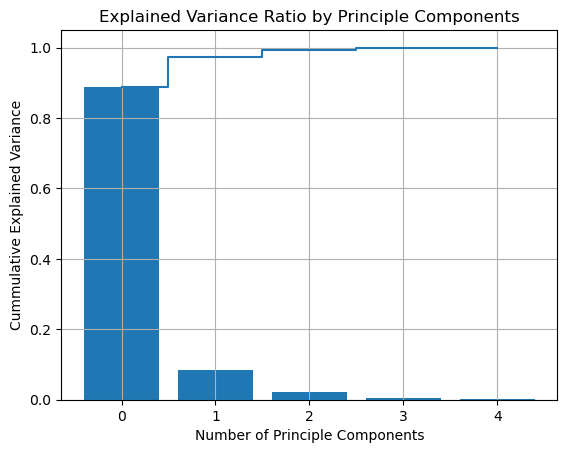

In [109]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scale=dff.drop(columns=['date','KRW_yoy','NICKEL_yoy'])

pca=PCA(n_components=5)
X_pca=pca.fit_transform(X_scale)

explained_variance_ratio=pca.explained_variance_ratio_
cum_var_exp=np.cumsum(explained_variance_ratio)

num_components=len(explained_variance_ratio)

import matplotlib.pyplot as plt

plt.bar(range(num_components), explained_variance_ratio,align='center' , label='Individual Explained Ratio')
plt.step(range(num_components), cum_var_exp,where='mid',label='Cummulative Explained Variance')

plt.xlabel('Number of Principle Components')
plt.ylabel('Cummulative Explained Variance')
plt.title('Explained Variance Ratio by Principle Components')

plt.grid()
plt.show()



In [111]:
from sklearn.metrics import mean_absolute_error

dfx=pd.DataFrame(X_pca)

dfx['date']=dff['date']


In [113]:
percentile =np.percentile(dff['KRW_yoy'].abs(),[10,90])
dff['y1']=pd.cut(dff['KRW_yoy'], bins=[-np.inf, -percentile[1], percentile[1], np.inf], labels=[-1,0,1])

print(dff)

print(dff['y1'].value_counts())

            date     USGG10YR    SP500      DXY    WTI     GOLD     KRW  \
335   1996-05-28  1598.800959   672.23   89.000  21.11   391.50   787.1   
336   1996-05-29  1573.405039   667.93   88.340  20.76   391.25   788.2   
337   1996-05-30  1572.103636   671.70   88.250  19.94   391.05   787.8   
338   1996-05-31  1559.427904   669.12   87.780  19.76   391.00   787.9   
339   1996-06-01  1559.427904   669.12   87.780  19.76   391.00   787.9   
...          ...          ...      ...      ...    ...      ...     ...   
10908 2025-05-09  2383.887176  5659.91  100.339  61.02  3324.98  1400.0   
10909 2025-05-10  2383.887176  5659.91  100.339  61.02  3324.98  1400.0   
10910 2025-05-11  2383.887176  5659.91  100.339  61.02  3324.98  1400.0   
10911 2025-05-12  2336.686126  5844.19  101.788  61.95  3236.39  1402.4   
10912 2025-05-13  2339.641657  5886.55  101.003  63.67  3250.31  1416.0   

         NICKEL  USGG10YR/SP500  USGG10YR/DXY  ...  KRW/NICKEL_30d_corr  \
335     7850.00        2

In [115]:
dfxy = dfx.merge(dff[['date', 'y1']], on='date', how='left')

dfxy=dfxy.dropna()

print(dfxy)

                 0            1            2           3           4  \
335   -7776.237227 -2157.156668  -509.472856  -55.242849  -28.265970   
336   -7820.024376 -2119.850275  -496.334610  -57.090712  -34.485123   
337   -7874.785317 -2107.742612  -489.863906  -59.798203  -38.072086   
338   -7875.468871 -2099.042519  -494.238738  -73.126147  -39.584502   
339   -7855.467053 -2088.540670  -483.814920  -84.361101  -48.406185   
...            ...          ...          ...         ...         ...   
10573   802.372231   -77.668180  4356.366884 -385.671403  843.445791   
10574   800.423501   -76.728276  4357.271864 -418.395015  839.625766   
10575   799.661544   -76.531320  4357.721795 -431.261825  838.269731   
10576   618.108610   -87.625866  4517.425012 -424.083009  700.484410   
10577   723.068496   -75.655909  4557.059212 -455.426154  695.123025   

            date y1  
335   1996-05-28  0  
336   1996-05-29  0  
337   1996-05-30  0  
338   1996-05-31  0  
339   1996-06-01  0  
...

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score


train_data=dfxy[(dfxy['date']>='1996-05-28')& (dfxy['date']<='2019-12-31')]
test_data=dfxy[dfxy['date']>='2020-01-01']

X_train=train_data.drop(columns=['date','y1'])
y_train=train_data['y1']

X_test=test_data.drop(columns=['date','y1'])
y_test=test_data['y1']

model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy_score=accuracy_score(y_pred, y_test)
print(accuracy_score)

0.9593846153846154


In [ ]:
pipe_lr=make_pipeline(StandardScaler, LogisticRegression(penalty='l2', max_iter=10000))
train_sizes, train_scores, test_scores=learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), cv=10, n_jobs=1)

train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)







